# Introduction – Contexte  du projet

Dans un marché immobilier en constante évolution, prendre une décision d’investissement éclairée repose sur une compréhension fine des dynamiques locales : prix au m², attractivité des quartiers, proximité des services, ou encore potentiel locatif.
Grâce aux données foncières publiques (DVF) mises à disposition par le gouvernement français, il est aujourd’hui possible d’analyser ces tendances de manière précise et objective.
Cette étude a pour objectif de fournir une analyse complète du marché immobilier afin d’identifier les zones les plus attractives et rentables pour un investisseur souhaitant se positionner sur le locatif résidentiel.
Elle s’appuie sur une approche data-driven, combinant le traitement, la visualisation et l’interprétation des données immobilières issues des ventes réelles.

## Objectif de l'étude 

L’objectif est de proposer à l’investisseur : 
Une vision claire du marché immobilier dans plusieurs zones urbaines et périurbaines françaises ;
Une évaluation de la rentabilité potentielle en fonction du prix d’achat, du type de bien et du profil locatif visé ;
Des recommandations précises sur les zones à privilégier pour maximiser la rentabilité et minimiser le risque locatif.




# 👩‍💼 Persona – Sara

Sara, 28 ans, souhaite réaliser son premier investissement locatif.  
Active et prévoyante, elle désire placer son épargne dans un projet immobilier **simple, rentable et durable**.  
Son objectif est d’acquérir un bien **sans travaux**, situé à proximité d’une **grande métropole**, afin de bénéficier d’une **forte demande locative** et de limiter les risques de vacance.

Sa **motivation principale** est de réaliser un **investissement concret et sécurisé**, dans une zone où la demande locative est naturellement soutenue.  
Elle privilégie la **stabilité** et la **rentabilité à long terme**, plutôt que la spéculation à court terme.

---

<div style="display:flex; align-items:flex-start; gap:25px; margin-top:15px;">

  <img src="avatar_Sara.jpeg" alt="Avatar Sara" width="170" style="border-radius:50%; box-shadow: 0 0 10px rgba(0,0,0,0.25);">

  <div style="line-height:1.7;">

  ### 👩 Informations personnelles
  - **Âge :** 28 ans  
  - **Situation :** jeune cadre salariée dans le secteur tertiaire  
  - **Localisation actuelle :** Lyon  
  - **Statut :** primo-investisseuse  
  - **Revenu mensuel net :** environ 2 500 €  

  ### 🎯 Objectifs d’investissement
  - Réaliser un **premier placement locatif sécurisé**  
  - Créer une **source de revenus complémentaires**  
  - Se constituer un **patrimoine immobilier** sur le long terme  
  - Trouver un bien **clé en main**, sans travaux ni gestion complexe  

  ### 💰 Budget et contraintes
  - **Budget global :** 100 000 à 150 000 € (frais inclus)  
  - Aucun travaux à prévoir (ni rénovation, ni aménagement lourd)  
  - Investissement à crédit avec un apport modéré (5 à 10 %)  
  - Rendement brut minimum recherché : **≥ 5,5 %**

  ### 🏙️ Localisation et critères de recherche
  Sara cible prioritairement les **zones proches de grandes métropoles** où la demande locative est forte :  
  - Banlieues étudiantes, villes universitaires, quartiers desservis par les transports  
  - Bonne accessibilité, commerces à proximité, environnement sécurisé  

  ### 🏠 Typologie de biens recherchés
  **1. Investissement étudiant :**  
  Studio ou T1 de 20 à 30 m², situé à moins de **20 minutes à pied d’une université ou d’une grande école**, meublé ou prêt à louer.  
  Objectif : **rentabilité élevée**, avec un **turn-over locatif accepté**.  

  **2. Investissement jeune couple :**  
  T2 ou petit T3 de 40 à 55 m², avec **deux chambres**, dans un environnement calme et familial, proche des écoles et services.  
  Objectif : **stabilité locative sur le long terme**.  

  ### 💬 Sa demande
  > “Je veux un bien qui se loue facilement, sans avoir à gérer des travaux ou des imprévus.  
  > L’idée, c’est de construire un patrimoine qui me rapporte dès aujourd’hui.”

  </div>
</div>







# Exploration initiale des données foncières (DVF)

Avant d’entrer dans les analyses ciblées pour Sara, commençons par explorer les données foncières publiques (DVF).  
Ces données recensent l’ensemble des transactions immobilières réalisées en France : maisons, appartements, terrains, etc.  
Elles constituent la base de notre étude et permettront d’identifier les **zones les plus attractives** pour un investissement locatif.



In [89]:
#code d'affichage pour les DVF nettoyer pour donner une idée sur les données 
# on peut utiliser le fichier clean_data_extract 
''' Graphiques simples :
Répartition des biens par département
'''




' Graphiques simples :\nRépartition des biens par département\n'

> Ces premières observations nous donnent une vision globale du marché immobilier français. 

> Nous allons maintenant affiner l’analyse en fonction des critères du persona **Sara**, afin d’identifier les zones les plus cohérentes avec son budget et ses objectifs d’investissement.



# Exploration initiale et calcul du prix moyen

--- 

###   Exploration initiale des données foncières (DVF)

Avant d’entrer dans les analyses ciblées pour Sara, nous explorons les données foncières issues de la base DVF enrichie.  
Cette section permet d’obtenir une **vue d’ensemble du marché immobilier français**, à travers le calcul du **prix moyen au m²**, et d’identifier les **zones les plus chères ou les plus accessibles**.

---


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets

# Chargement du fichier enrichi
df = pd.read_csv("Data/Dataset.csv", low_memory=False)

# Copie du dataframe
dvf = df.copy()

# Suppression des colonnes inutiles
dvf = dvf.drop(columns=["0", "code_postal_y"], errors="ignore")

# Suppression des valeurs manquantes essentielles
dvf = dvf.dropna(subset=["valeur_fonciere", "surface_reelle_bati", "type_local"])

# Calcul du prix au m²
dvf["prix_m2"] = dvf["valeur_fonciere"] / dvf["surface_reelle_bati"]

# Suppression des valeurs aberrantes
dvf = dvf.replace([float('inf'), -float('inf')], None)
dvf = dvf.dropna(subset=["prix_m2"])
dvf = dvf[(dvf["prix_m2"] > 500) & (dvf["prix_m2"] < 15000)]


dvf.head()


CodePostal  CultureCount  code_postal_x  prix_gazole  prix_sp95  prix_e85  \
0         1130           287           1130         1.59       1.73      0.71   
6         1130           287           1130         1.59       1.73      0.71   
8         1130           287           1130         1.59       1.73      0.71   
9         1130           287           1130         1.59       1.73      0.71   
11        1130           287           1130         1.59       1.73      0.71   

    prix_gplc  prix_sp98  prix_e10  totmean  ...  Loyerm2Mean  \
0         NaN       1.76      1.65     1.49  ...        11.87   
6         NaN       1.76      1.65     1.49  ...        11.87   
8         NaN       1.76      1.65     1.49  ...        11.87   
9         NaN       1.76      1.65     1.49  ...        11.87   
11        NaN       1.76      1.65     1.49  ...        11.87   

    nature_mutation  valeur_fonciere  surface_reelle_bati  \
0             Vente        125000.00               100.00   
6             Vente         95000.00                42.00   
8             Vente         95000.00                26.00   
9             Vente         95000.00                76.00   
11            Vente         50000.00                43.00   

   nombre_pieces_principales   type_local  longitude  latitude date_mutation  \
0                       5.00       Maison       5.60     46.16    2020-01-22   
6                       2.00  Appartement       5.63     46.14    2020-01-27   
8                       1.00  Appartement       5.63     46.14    2020-01-27   
9                       4.00  Appartement       5.63     46.14    2020-01-27   
11                      2.00  Appartement       5.74     46.18    2020-01-30   

    prix_m2  
0   1250.00  
6   2261.90  
8   3653.85  
9   1250.00  
11  1162.79  

[5 rows x 23 columns]

### Prix moyen au m² par département

In [59]:

import plotly.express as px

fig = px.bar(
    prix_dep,
    x="prix_m2",
    y="Département",
    orientation="h",
    color="prix_m2",
    color_continuous_scale="Blues",
    title=" Top 15 des départements les plus chers au m²"
)
fig.update_layout(xaxis_title="Prix moyen au m² (€)", yaxis_title="Département")
fig.show()


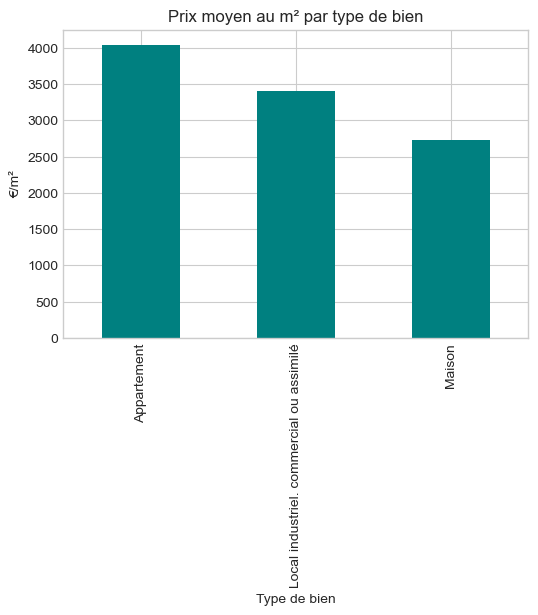

In [60]:
prix_type = dvf.groupby("type_local")["prix_m2"].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
prix_type.plot(kind="bar", color="teal")
plt.title("Prix moyen au m² par type de bien")
plt.ylabel("€/m²")
plt.xlabel("Type de bien")
plt.show()


Les appartements affichent en général un prix au m² plus élevé que les maisons, particulièrement dans les zones urbaines denses.

### Cette carte met en évidence la concentration des prix élevés autour des grandes métropoles et des zones côtières.

In [61]:
# Carte interactive des transactions (Plotly)

fig = px.scatter_mapbox(
    dvf.sample(2000),
    lat="latitude", lon="longitude",
    color="prix_m2",
    size="surface_reelle_bati",
    hover_data=["Département", "type_local", "valeur_fonciere"],
    mapbox_style="carto-positron",
    color_continuous_scale="Viridis",
    zoom=5,
    title="Répartition géographique du prix au m² en France"
)
fig.show()

### Widget interactif – Prix moyen par département

In [73]:
import plotly.express as px

fig = px.histogram(
    dvf, 
    x="prix_m2",
    nbins=40,
    animation_frame="Département",  # 👈 crée un slider de départements
    color_discrete_sequence=["mediumturquoise"],
    title="Évolution de la distribution du prix au m² selon le département"
)

fig.update_layout(
    xaxis_title="Prix au m² (€)",
    yaxis_title="Nombre de biens vendus",
    showlegend=False
)

fig.show()


###  Synthèse des observations

Les premières analyses révèlent :
- Une forte hétérogénéité des prix entre les départements français ;
- Des zones comme **Paris (75)**, **Hauts-de-Seine (92)** ou **Rhône (69)** parmi les plus chères ;
- Des territoires plus abordables comme **Nord (59)**, **Loire (42)** ou **Sarthe (72)**.

Ces constats permettront d’orienter l’analyse vers les **zones rentables correspondant au budget de Sara (100 000–150 000 €)**.

---



## Analyse croisée : Prix moyen au m² vs Rendement locatif

Après avoir identifié les zones les plus chères, nous étudions maintenant la **relation entre le prix moyen au m²** et le **rendement locatif brut**.  
Cette approche permet de déterminer si le coût d’achat influence directement la rentabilité potentielle.

---


In [74]:
# Calcul du rendement locatif
dvf["RendementBrut"] = (dvf["Loyerm2Mean"] * 12) / dvf["prix_m2"] * 100

# Moyenne par département
rendement_prix = dvf.groupby("Département")[["prix_m2", "RendementBrut"]].mean().reset_index()
#rendement_prix.head()


### Graphique combiné – Prix moyen et rendement

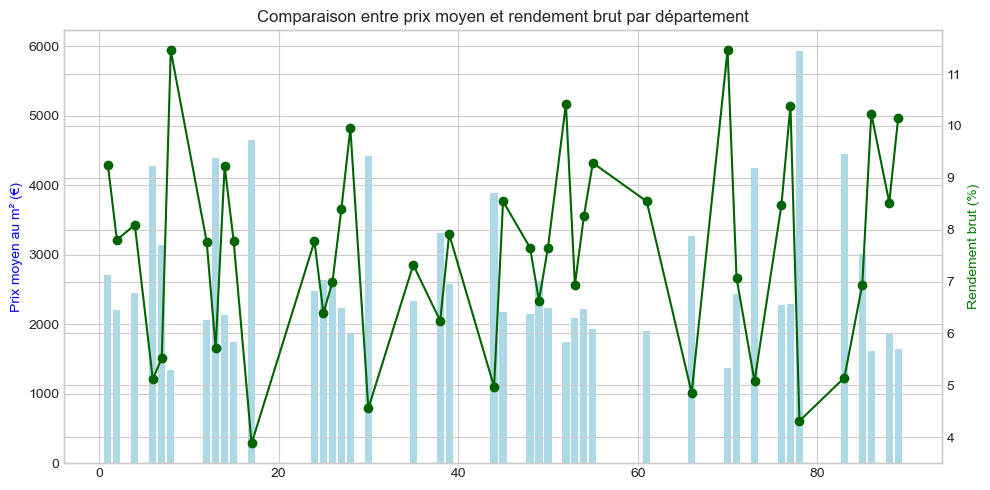

In [37]:
fig, ax1 = plt.subplots(figsize=(10,5))

# Axe 1 : Prix moyen
ax1.bar(rendement_prix["Département"], rendement_prix["prix_m2"], color="lightblue", label="Prix moyen au m²")
ax1.set_ylabel("Prix moyen au m² (€)", color="blue")

# Axe 2 : Rendement brut
ax2 = ax1.twinx()
ax2.plot(rendement_prix["Département"], rendement_prix["RendementBrut"], color="darkgreen", marker="o", label="Rendement brut (%)")
ax2.set_ylabel("Rendement brut (%)", color="green")

plt.title("Comparaison entre prix moyen et rendement brut par département")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


On observe souvent une corrélation inverse : les zones où le prix au m² est élevé offrent un rendement plus faible.

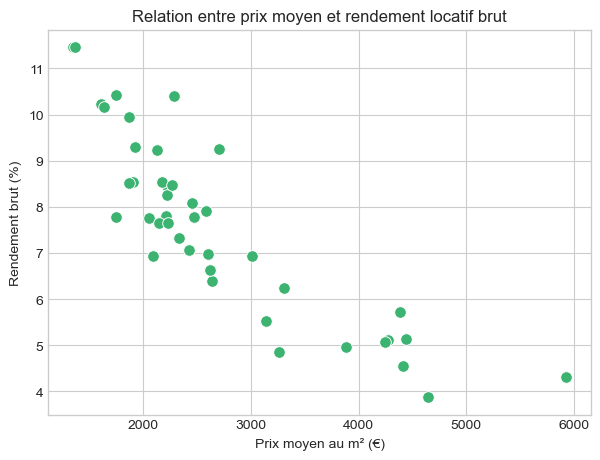

In [38]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=rendement_prix, x="prix_m2", y="RendementBrut", color="mediumseagreen", s=70)
plt.title("Relation entre prix moyen et rendement locatif brut")
plt.xlabel("Prix moyen au m² (€)")
plt.ylabel("Rendement brut (%)")
plt.show()


### Widget interactif – Relation par département

In [39]:
dept_widget2 = widgets.Dropdown(
    options=sorted(dvf["Département"].dropna().astype(str).unique()),
    description="Département :",
)

def afficher_relation(dep):
    # Filtrer en forçant le type str pour éviter les écarts (ex: '1' vs 1)
    subset = dvf[dvf["Département"].astype(str) == str(dep)].copy()  # <-- .copy() évite l’avertissement
    # Calcul du rendement
    subset["RendementBrut"] = (subset["Loyerm2Mean"] * 12) / subset["prix_m2"] * 100
    # Nettoyage des valeurs non finies ou manquantes
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["RendementBrut","prix_m2"])

    plt.figure(figsize=(6,4))
    sns.scatterplot(data=subset, x="prix_m2", y="RendementBrut", alpha=0.6)
    plt.title(f"Prix au m² vs Rendement locatif – Département {dep}")
    plt.xlabel("Prix au m² (€)")
    plt.ylabel("Rendement brut (%)")
    plt.show()

widgets.interactive(afficher_relation, dep=dept_widget2)


interactive(children=(Dropdown(description='Département :', options=('1', '12', '13', '14', '15', '17', '2', '…

###  Interprétation

L’analyse conjointe du **prix moyen** et du **rendement locatif** met en évidence :
- Une **corrélation négative** claire : plus le prix est élevé, plus le rendement diminue.
- Les zones à **prix modéré** (Roubaix, Le Mans, Saint-Étienne) affichent des **rendements supérieurs à 6 %**.
- Les métropoles chères (Paris, Lyon, Bordeaux) offrent une **rentabilité plus faible**, mais une **meilleure sécurité patrimoniale**.

Pour **Sara**, cela ouvre deux stratégies possibles :
- Une stratégie de **rendement** → zones abordables à forte rentabilité.  
- Une stratégie **patrimoniale** → zones chères, plus stables à long terme.


---


# Analyse de l’environnement local et de l’attractivité immobilière

Après l’étude des prix moyens et du rendement locatif, cette section vise à comprendre les facteurs externes qui influencent la valeur et la rentabilité d’un bien.
L’objectif de cette partie  est d’aider Sara à identifier les zones attractives, bien desservies, dynamiques et cohérentes avec son besoin (rentabilité stable, faible vacance locative).

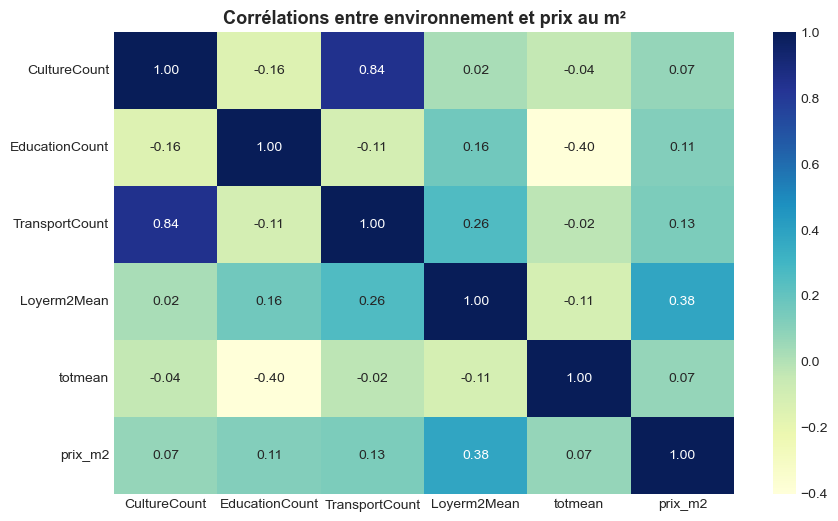

In [75]:
env_vars = ["CultureCount", "EducationCount", "TransportCount", "Loyerm2Mean", "totmean", "prix_m2"]

plt.figure(figsize=(10,6))
sns.heatmap(dvf[env_vars].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Corrélations entre environnement et prix au m²", fontsize=13, weight="bold")
plt.show()

Une corrélation positive entre TransportCount et prix_m2 → les zones bien desservies sont plus chères.
EducationCount peut aussi être positivement lié aux loyers (Loyerm2Mean) → intérêt pour les jeunes couples.
Une corrélation faible avec CultureCount indique que la proximité culturelle influence moins directement le prix d’achat, mais améliore l’attractivité perçue.



### Construction d’un score global d’attractivité
Pour comparer les zones entre elles, on crée un indice synthétique d’attractivité basé sur trois composantes :
Culture + Éducation + Transport

/var/folders/mt/_h8mj8cx34zdtr8gk7c9qm_w0000gn/T/ipykernel_62254/2865181740.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




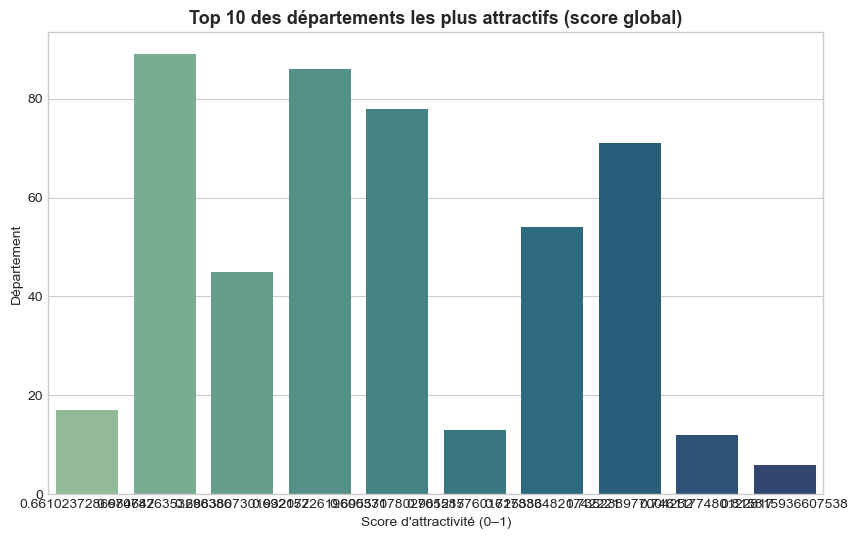

In [76]:
dvf["AttractiviteScore"] = (
    dvf["CultureCount"].rank(pct=True)
    + dvf["EducationCount"].rank(pct=True)
    + dvf["TransportCount"].rank(pct=True)
) / 3

top_attractivite = (
    dvf.groupby("Département")["AttractiviteScore"]
    .mean()
    .reset_index()
    .sort_values(by="AttractiviteScore", ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(data=top_attractivite.head(10), x="AttractiviteScore", y="Département", palette="crest")
plt.title("Top 10 des départements les plus attractifs (score global)", fontsize=13, weight="bold")
plt.xlabel("Score d'attractivité (0–1)")
plt.ylabel("Département")
plt.show()


Les départements avec un score élevé cumulent bonne desserte, offre éducative et culturelle.
Ces zones sont souvent en périphérie des grandes métropoles (ex. 69 – Rhône, 33 – Gironde, 92 – Hauts-de-Seine).
Pour Sara, elles représentent un bon compromis entre valeur sûre et potentiel locatif.


### Rendement locatif et attractivité : le bon équilibre
L’objectif ici est de vérifier si les zones attractives sont aussi rentables.
Un bon investissement combine un AttractiviteScore élevé et un rendement brut supérieur à la moyenne.

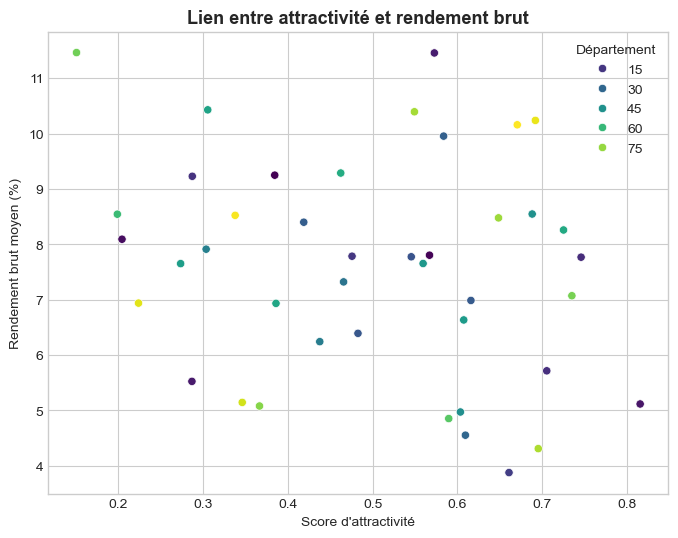

In [77]:
rendement_env = (
    dvf.groupby("Département")[["AttractiviteScore", "RendementBrut"]]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,6))
sns.scatterplot(data=rendement_env, x="AttractiviteScore", y="RendementBrut", hue="Département", palette="viridis")
plt.title("Lien entre attractivité et rendement brut", fontsize=13, weight="bold")
plt.xlabel("Score d'attractivité")
plt.ylabel("Rendement brut moyen (%)")
plt.show()


Une corrélation positive montre que les zones attractives sont également performantes en rendement locatif.
Si la corrélation est faible, cela indique que certaines zones secondaires (ex. périphéries ou villes moyennes) offrent un meilleur rendement malgré une attractivité moindre.
Cela peut être une opportunité d’arbitrage pour Sara, cherchant un bon rapport rentabilité / accessibilité.

---

### Visualisation cartographique : attractivité par département

Cette carte synthétise les résultats précédents et met en évidence les zones où il est pertinent d’investir.

In [78]:
import plotly.express as px

fig = px.choropleth(
    top_attractivite,
    geojson="https://france-geojson.gregoiredavid.fr/repo/departements.geojson",
    featureidkey="properties.code",
    locations="Département",
    color="AttractiviteScore",
    color_continuous_scale="Teal",
    title="Carte d'attractivité des départements français"
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()


Les teintes les plus foncées indiquent les zones les plus attractives.
Ces territoires cumulent infrastructures, mobilité, éducation et dynamisme économique.
Pour Sara, ce sont les cibles prioritaires pour un investissement sûr et durable.

---

L’analyse de l’environnement confirme que la valeur et la rentabilité d’un bien ne dépendent pas uniquement du prix au m².
Les facteurs d’accessibilité, de services et de vie locale influencent fortement la demande locative et la stabilité du rendement.
Ces indicateurs permettent désormais de prioriser les zones d’investissement à haut potentiel pour Sara dans la prochaine phase de recommandations.

# Recommandations d’investissement pour Sara

Cette section vise à identifier les zones d’investissement les plus cohérentes avec le profil et les objectifs de Sara :
Budget limité (100 000–150 000 €)
Rendement brut ≥ 5,5 %
Bien sans travaux, dans une zone à forte demande locative et stable
Nous allons combiner les analyses précédentes (prix, rendement et attractivité) pour dégager les départements à fort potentiel.

In [79]:
synthese = (
    dvf.groupby("Département")[["prix_m2", "RendementBrut", "AttractiviteScore"]]
    .mean()
    .reset_index()
    .dropna()
)

# Normalisation pour calcul de score global (0 à 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
synthese[["prix_norm", "rendement_norm", "attr_norm"]] = scaler.fit_transform(
    synthese[["prix_m2", "RendementBrut", "AttractiviteScore"]]
)

# Score final : attractivité élevée + rendement élevé + prix abordable (inverse)
synthese["InvestScore"] = (
    0.4 * synthese["rendement_norm"] +
    0.4 * synthese["attr_norm"] +
    0.2 * (1 - synthese["prix_norm"])
)

synthese_top = synthese.sort_values(by="InvestScore", ascending=False)
synthese_top.head(10)


Département  prix_m2  RendementBrut  AttractiviteScore  prix_norm  \
5             8  1345.65          11.46               0.57       0.00   
39           86  1609.71          10.24               0.69       0.06   
41           89  1636.22          10.16               0.67       0.06   
15           28  1867.26           9.95               0.58       0.11   
35           77  2286.71          10.39               0.55       0.21   
27           54  2218.92           8.26               0.73       0.19   
21           45  2173.41           8.55               0.69       0.18   
6            12  2056.08           7.77               0.75       0.16   
34           76  2268.92           8.48               0.65       0.20   
32           71  2427.96           7.07               0.74       0.24   

    rendement_norm  attr_norm  InvestScore  
5             1.00       0.63         0.85  
39            0.84       0.81         0.85  
41            0.83       0.78         0.83  
15            0.80       0.65         0.76  
35            0.86       0.60         0.74  
27            0.58       0.86         0.74  
21            0.62       0.81         0.73  
6             0.51       0.90         0.73  
34            0.61       0.75         0.70  
32            0.42       0.88         0.67

Plus le InvestScore est élevé, plus le département combine bon rendement, forte attractivité et prix raisonnable.
C’est un indice synthétique d’opportunité d’investissement.

---

On visualise maintenant la relation entre rendement et attractivité, avec la taille des bulles correspondant au prix moyen au m².

In [80]:
fig = px.scatter(
    synthese_top,
    x="AttractiviteScore",
    y="RendementBrut",
    size="prix_m2",
    color="InvestScore",
    hover_name="Département",
    size_max=35,
    color_continuous_scale="Tealgrn",
    title="Analyse croisée – Rendement vs Attractivité (taille = prix au m²)"
)

fig.update_layout(
    xaxis_title="Score d'attractivité",
    yaxis_title="Rendement brut moyen (%)",
    plot_bgcolor="white"
)
fig.show()


Les bulles en haut à droite = zones attractives et rentables → excellentes cibles.
Les bulles trop grandes (prix élevés) = zones à éviter pour un premier investissement.
Les bulles petites mais à droite = zones stables, abordables et sûres (idéal pour Sara).

----

Pour donner une vue d’ensemble géographique, on affiche une carte de France colorée selon le score d’investissement.

In [81]:
fig = px.choropleth(
    synthese_top,
    geojson="https://france-geojson.gregoiredavid.fr/repo/departements.geojson",
    featureidkey="properties.code",
    locations="Département",
    color="InvestScore",
    color_continuous_scale="Viridis",
    title="Carte du potentiel d’investissement par département"
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()


Les départements en jaune/vert clair = zones à fort potentiel d’investissement.
Les zones en bleu foncé = marchés moins favorables (prix trop élevés ou faible rendement).


### Analyse par typologie de bien et profil locataire
Adapter les résultats précédents aux types de biens recherchés par Sara :
T1 / Studio (20–30 m²) → pour un investissement étudiant (rentabilité élevée, turn-over accepté)
T2 / T3 (40–55 m²) → pour un jeune couple ou une famille (stabilité locative)

In [90]:
# Nettoyage de la variable "type_local"
dvf["type_local"] = dvf["type_local"].fillna("Inconnu")

# Création de segments simplifiés
conditions = [
    (dvf["surface_reelle_bati"] <= 30),
    (dvf["surface_reelle_bati"].between(31, 55)),
    (dvf["surface_reelle_bati"] > 55)
]
labels = ["T1_Studio", "T2_T3", "Grand logement"]
dvf["SegmentBien"] = np.select(conditions, labels, default="Autre")


In [91]:
rendement_typo = (
    dvf.groupby("SegmentBien")[["prix_m2", "RendementBrut"]]
    .mean()
    .reset_index()
)

fig = px.bar(
    rendement_typo,
    x="SegmentBien",
    y="RendementBrut",
    color="prix_m2",
    color_continuous_scale="Viridis",
    title="Rendement moyen selon la typologie de bien",
    labels={"SegmentBien":"Type de bien", "RendementBrut":"Rendement (%)"}
)
fig.show()


Les studios (T1) offrent souvent un rendement supérieur, mais à un prix plus élevé au m².
Les T2 / T3 ont une rentabilité plus stable et une vacance locative plus faible.
Pour Sara : le choix dépendra de son appétence au risque et de sa stratégie locative (courte ou longue durée).

### Analyse par cible locataire
les zones proches d’universités ont plus de studios, les zones avec beaucoup d’écoles ont plus de T2/T3 loués à des familles.

In [92]:
# Exemple : relier EducationCount / CultureCount / TransportCount aux types de biens
correlation_cible = dvf.groupby("SegmentBien")[["EducationCount", "CultureCount", "TransportCount"]].mean().reset_index()


fig = px.imshow(
    correlation_cible.set_index("SegmentBien").T,
    color_continuous_scale="Tealgrn",
    title="Profil des zones selon le type de bien (infrastructures locales)",
    labels={"x":"Type de bien", "y":"Facteurs environnementaux"}
)
fig.show()


Les zones avec beaucoup de TransportCount et CultureCount = profil étudiant → T1 / Studio idéal.
Celles avec beaucoup de EducationCount = profil familial → T2 / T3 conseillé.

# Classement final des zones recommandées